In [1]:
#Useful Imports
import pandas as pd
import numpy as np
from PIL import Image
import os, sys
import matplotlib.pyplot as plt

In [2]:
#A handy resizing function in case we find images but they are too large
#Path to images
imgsPath = "/home/peterjr/RepoCollections/ConvolutionOperators/Images/"
finalPath = "/home/peterjr/RepoCollections/ConvolutionOperators/128Images/"


#Resize the images to be 128x128
from PIL import Image
import os, sys

dirs = os.listdir(imgsPath)

def resize(SIZE):
    print(len(dirs))
    for item in dirs:
        im = Image.open(imgsPath+item)
        f, e = os.path.splitext(imgsPath+item)
        #print(item)
        imResize = im.resize((SIZE,SIZE), Image.ANTIALIAS)
        imResize.save(finalPath+item, 'WEBP', quality=95)

In [3]:
#Only call this if we want images to be resized
resize(128)

2


/tmp/ipykernel_51152/3307975197.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = im.resize((SIZE,SIZE), Image.ANTIALIAS)


### Single Channel Image Tests

In [4]:
#Load in the image -> numpy array
imageName = "GrayscaleFlower.webp"
flowerImg = Image.open(finalPath+imageName)
 
#Read as single channel to numpy array
imgArray = np.array(flowerImg)

#Shape Row Pixels, Column Pixels, Channels -> 1
print(imgArray.shape)

(128, 128, 3)


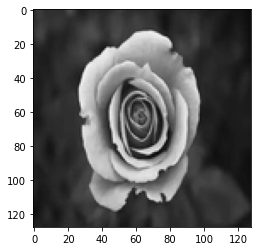

In [5]:
plt.imshow(flowerImg)

In [6]:
#Calculate the image size after applying a convolution -> Helper Function
def calcTargetSize(imgSize, kernelSize):
    numPixels = 0
    
    for i in range(imgSize):
        
        added = i + kernelSize
        
        if added <= imgSize:
            numPixels += 1
            
    return numPixels


In [7]:
#Operations
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [8]:
def convolve(img, kernel):
    
    targetSize = calcTargetSize(
        img.shape[0],
        kernel.shape[0]
    )
    
    #Simplification
    k = kernel.shape[0]
    
    #2d zeros array
    convolvedImg = np.zeros(shape=(targetSize,targetSize))
    
    #Row -> Column iteration
    for i in range(targetSize):
        
        for j in range(targetSize):
            
            #img with kernel 'window' size
            currMatrix = img[i:i+k, j:j+k]
            
            #Apply operation -> elementwise multiplication -> summation into [i,j]
            convolvedImg[i, j] = np.sum(np.multiply(currMatrix, kernel))
            
    return convolvedImg

In [9]:
sharpenedImg = convolve(imgArray,sharpen)
blurredImg = convolve(imgArray,blur)
outlinedImg = convolve(imgArray,outline)

<Figure size 432x288 with 0 Axes>

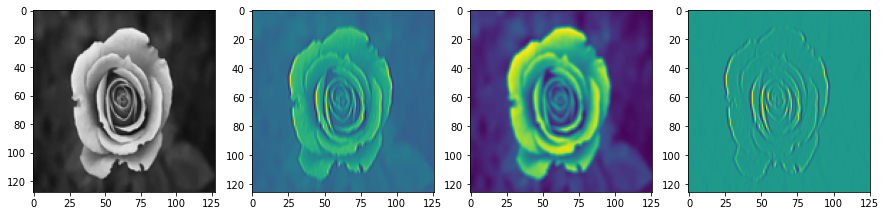

In [12]:
plt.figure()

figure, axarr = plt.subplots(1,4,figsize=(15,5)) 

axarr[0].imshow(flowerImg) #original img
axarr[1].imshow(sharpenedImg)
axarr[2].imshow(blurredImg)
axarr[3].imshow(outlinedImg)

### 3 Channel Testing